The first step is to import the packages that will be needed for my analysis of population data

In [ ]:
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np

In this code I will import data and view the first five rows of the data

In [39]:
new_pop_data = pd.read_csv(r"NST-EST2024-ALLDATA.csv")
new_pop_data.head()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,6.840246,8.231786,0.000000,0.000000,0.000000,0.000000,1.133093,5.084797,6.840246,8.231786
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,8.175150,9.848371,-4.674375,-7.824957,-4.857718,-3.334322,-3.271477,-2.006798,3.317432,6.514050
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8.005202,9.622685,2.416795,-2.957175,-2.067991,-1.575091,4.188365,4.325839,5.937211,8.047594
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,8.236647,9.930153,-7.206423,-9.578005,-5.867209,-3.971810,-5.935167,-4.287388,2.369438,5.958342
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,4.859117,5.861482,-2.502867,-2.649762,-1.300416,-0.709222,-1.700819,0.891824,3.558701,5.152260


This code shows the final five rows of the data set

In [18]:
new_pop_data.tail()

,c,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
61,40,4,9,53,Washington,7707586,7727209,7743760,7794123,7857320,...,8.570200,10.316588,-2.028057,-0.444333,-2.209764,0.337770,-0.219379,5.160549,6.360436,10.654358
62,40,3,5,54,West Virginia,1793736,1791646,1785618,1774122,1770495,...,1.309027,1.604870,1.668314,0.162371,1.859721,2.553330,2.074770,1.102328,3.168749,4.158200
63,40,2,3,55,Wisconsin,5894170,5897375,5881608,5903975,5930405,...,3.083727,3.724715,-3.158677,1.273081,1.298758,1.064973,-2.617204,4.614960,4.382486,4.789688
64,40,4,8,56,Wyoming,576844,577681,579636,581978,585067,...,1.777138,2.191552,3.126196,4.216547,2.983604,1.468425,3.362951,5.165227,4.760742,3.659977
65,40,X,X,72,Puerto Rico,3285874,3281590,3262711,3220137,3203792,...,-0.016812,4.745995,0.000000,0.000000,0.000000,0.000000,-1.319316,-8.681678,-0.016812,4.745995


In [64]:
pop_sub = new_pop_data[["NAME", "POPESTIMATE2023", "RINTERNATIONALMIG2023","RDOMESTICMIG2023","RNETMIG2023", "RINTERNATIONALMIG2024", "RDOMESTICMIG2024", "RNETMIG2024",  ]]

In [65]:
pop_sub.head()

,NAME,POPESTIMATE2023,RINTERNATIONALMIG2023,RDOMESTICMIG2023,RNETMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2024,RNETMIG2024
0,United States,336806231,6.840246,0.000000,6.840246,8.231786,0.000000,8.231786
1,Northeast Region,57398303,8.175150,-4.857718,3.317432,9.848371,-3.334322,6.514050
2,New England,15263573,8.005202,-2.067991,5.937211,9.622685,-1.575091,8.047594
3,Middle Atlantic,42134730,8.236647,-5.867209,2.369438,9.930153,-3.971810,5.958342
4,Midwest Region,69186401,4.859117,-1.300416,3.558701,5.861482,-0.709222,5.152260


In [66]:
pop_sub.rename(columns={'NAME':'name', 'POPESTIMATE2023':'popestimate2023', 'RINTERNATIONALMIG2023':'internationalmig2023', 'RDOMESTICMIG2023':'domesticmig2023', 'RNETMIG2023':'netmig2023','RINTERNATIONALMIG2024':'internationalmig2024', 'RDOMESTICMIG2024':'domesticmig2024', 'RNETMIG2024':'netmig2024'}, inplace=True)
pop_sub.head()

C:\Users\mchlp\AppData\Local\Temp\ipykernel_38900\2062843892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_sub.rename(columns={'NAME':'name', 'POPESTIMATE2023':'popestimate2023', 'RINTERNATIONALMIG2023':'internationalmig2023', 'RDOMESTICMIG2023':'domesticmig2023', 'RNETMIG2023':'netmig2023','RINTERNATIONALMIG2024':'internationalmig2024', 'RDOMESTICMIG2024':'domesticmig2024', 'RNETMIG2024':'netmig2024'}, inplace=True)


,name,popestimate2023,internationalmig2023,domesticmig2023,netmig2023,internationalmig2024,domesticmig2024,netmig2024
0,United States,336806231,6.840246,0.000000,6.840246,8.231786,0.000000,8.231786
1,Northeast Region,57398303,8.175150,-4.857718,3.317432,9.848371,-3.334322,6.514050
2,New England,15263573,8.005202,-2.067991,5.937211,9.622685,-1.575091,8.047594
3,Middle Atlantic,42134730,8.236647,-5.867209,2.369438,9.930153,-3.971810,5.958342
4,Midwest Region,69186401,4.859117,-1.300416,3.558701,5.861482,-0.709222,5.152260


array([[<Axes: title={'center': 'popestimate2023'}>]], dtype=object)

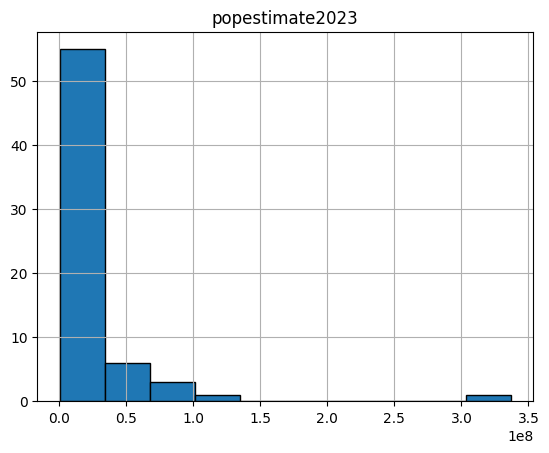

In [67]:
pop_sub.hist("popestimate2023", bins = 10, edgecolor = "black")

array([[<Axes: title={'center': 'internationalmig2023'}>]], dtype=object)

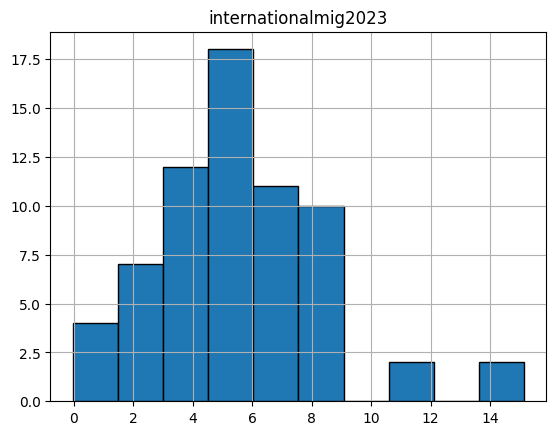

In [68]:
pop_sub.hist("internationalmig2023", bins=10, edgecolor = "black")

array([[<Axes: title={'center': 'domesticmig2023'}>]], dtype=object)

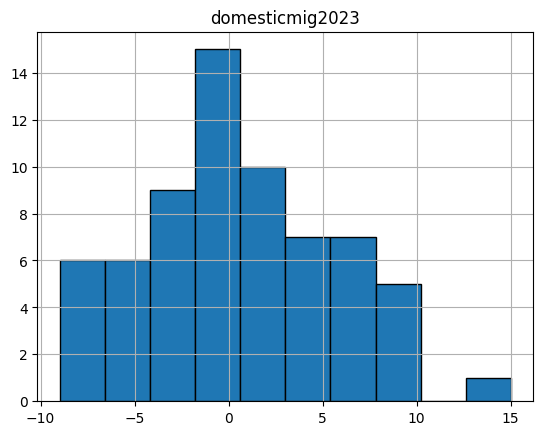

In [69]:
pop_sub.hist("domesticmig2023", bins=10, edgecolor = "black")

array([[<Axes: title={'center': 'netmig2023'}>]], dtype=object)

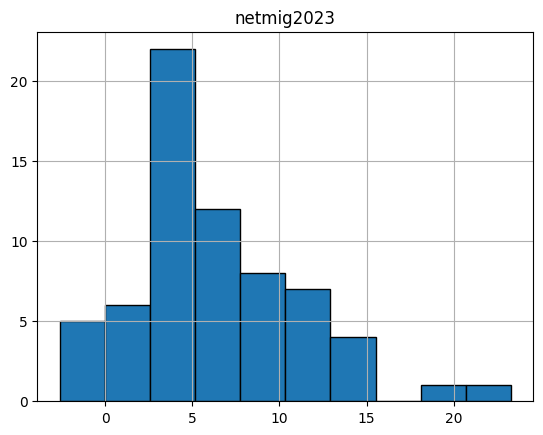

In [70]:
pop_sub.hist("netmig2023", bins=10, edgecolor = "black")